## AST1420 ``Galactic Structure and Dynamics'' Problem Set 3  
#### Due on Nov. 19 at the start of class

#### Problem 1: Gravitational collapse in one dimension.

``[One] grows stale if he works all the time on insoluble problems, and a trip to the beautiful world of one dimension will refresh his imagination better than a dose of LSD.''

Gravitational $N$-body simulations of structure formation in the Universe are complex and computationally demanding. 

Fortunately, some of the physics of gravitational collapse can be understood by simulating one-dimensional systems, where it is easy to reach high resolution and where gravity is simpler. Let's explore the formation of dark matter halos using gravitational $N$-body simulations in one
dimension.

(a) The Poisson equation is as usual

\begin{equation}
  \nabla^2 \Phi = 4\pi G \rho\,.
\end{equation}

An important aspect of understanding gravitation is the determination of the Green's function, that is, the solution of this equation
for a density $\rho(x) \propto \delta(x)$. 

In three dimensions, we showed in the notes that the gravitational potential for $\rho(\vec{x}) = M\,\delta(\vec{x})$ is the familiar $\Phi = -GM/r$ with $r = |\vec{x}|$. 

- Show that the solution for $\rho(x) = A\,\delta(x)$ in one dimension is given by $\Phi(x) = 2\pi G\,A\,|x|$. 
- What are the units of $A$?

\begin{equation}
  \nabla^2 (2\pi G\,A\,|x|) = \Big(\frac{\partial^2 }{\partial x^2} + \frac{\partial^2 }{\partial y^2}\Big) (2\pi G\,A\,|x|)
\end{equation}

Since we're only considering one dimension

\begin{equation}
  \frac{\partial^2 }{\partial x^2} (2\pi G\,A\,|x|)
\end{equation}

\begin{equation}
  \frac{\partial }{\partial x} (2\pi G\,A\,\frac{x}{|x|})
\end{equation}

The derivative of $\frac{x}{|x|}$ is $2\delta(x)$. The 2 because you're jumping from -1 to 1.  

\begin{equation}
  2\pi G\,A\ 2 \delta(x)
\end{equation}

Setting this equal to the right hand side and solving for $\rho (x)$: 

\begin{equation}
  4\pi G\,A\ \delta(x) = \Big(\frac{\partial^2 }{\partial x^2} + \frac{\partial^2 }{\partial y^2}\Big) (2\pi G\,A\,|x|)
\end{equation}

\begin{equation}
  4\pi G\,A\ \delta(x) =  4\pi G \rho
\end{equation}

\begin{equation}
 \rho = \,A\ \delta(x) 
\end{equation}


If x is in units of meters then $\delta(x)$ is in units of $\frac{1}{m}$. This is a property of dirac delta functions where $\delta(\alpha x) = \frac{1}{|\alpha|}\delta(x)$. So by dimensional analysis


\begin{equation}
 \big[\frac{kg}{m^3}\big] = \,A\ \big[\frac{1}{m}\big]
\end{equation}

\begin{equation}
 \,A\ = \big[\frac{kg}{m^2}\big]
\end{equation}


(b) The gravitational force corresponding to $\Phi(x) = 2\pi G\,A\,|x|$ is $F = -\mathrm{d} \Phi / \mathrm{d} x = -2\pi G\,A\,\mathrm{sign}(x)$, where $\mathrm{sign}(x)$ is the sign function that is equal to one for $x > 0$, equal to minus 1 for $x < 0$ and equal to zero for $x=0$. 

Therefore, very unlike what happens in three dimensions, the gravitational force is constant as a function of distance! 

In the next part, we will run an $N$-body simulation for $N$ equal-mass particles (so all $A$ are equal; you can also assume that $2\pi G = 1$). Because the gravitational force is constant with distance, the total force on any given particle $i$ in the sequence is therefore given by $A\times\,(N^+_i-N^-_i)$, where $N^+$ is the number of particles with $x > x_i$ and $N^-_i$ is the number of particles with $x < x_i$. 

Write a function that for a given array of positions $x_i$ computes the total force on each particle. 

Test this function by applying it to a large number of particles uniformly distributed between $-1/2$ and $1/2$, for which you should compute the analytical solution.

Time taken: 0.24 s


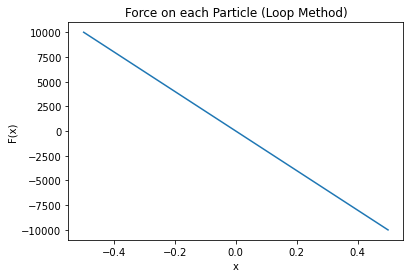

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time

N = 10001
xs = np.linspace(-0.5,0.5,N)

def force_per_particle(xs):
    F = np.zeros(len(xs))

    for i,x in enumerate(xs): 

        N_plus = len(xs[xs>x])

        N_minus = len(xs[xs<x])

        F[i] = N_plus - N_minus
    
    return F 
s = time.time()
F = force_per_particle(xs)
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force on each Particle (Loop Method)");

Time taken: 0.32 s


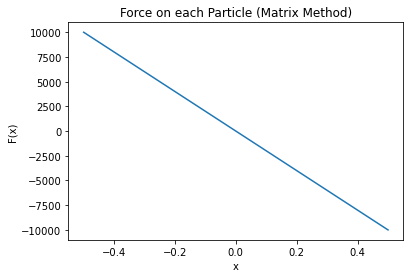

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import time
N = 10001
xs = np.linspace(-0.5,0.5,N)

def force_per_particle_matrix(xs):
   
    x1,x2 = np.meshgrid(xs,xs,copy=False)
    x = x1 - x2
    d = np.sign(x)
    F = - np.sum(d,axis=0)
    return F 

s = time.time()
F = force_per_particle_matrix(xs)
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force on each Particle (Matrix Method)");

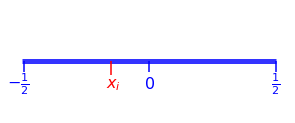

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(5,2))
plt.hlines(1,xmin=0,xmax=1,lw=5,alpha=0.8,color="blue")
plt.vlines([0.005,0.5,0.99999],0.8,1,color="blue")
plt.vlines(0.35,0.75,1,color='r')
plt.text(-.06,0.5,r'$- \frac{1}{2}$',fontsize=16,color="blue")
plt.text(1-.02,0.5,r'$\frac{1}{2}$',fontsize=16,color="blue")
plt.text(0.48,0.5,r'$0$',fontsize=16,color="blue")
plt.text(0.33,0.5,r'$x_i$',fontsize=16,color="red")
plt.ylim(0,2)
plt.axis('off');

The analytic solution: 

$N_i^+ : x > x_i  = (\frac{1}{2} - x_i) \; N $


$N_i^- : x < x_i  = \big(x_i - (-\frac{1}{2} )\big) \; N $


$F(x) = A\times\,(N^+_i-N^-_i)$

$F(x) = A\times\,((\frac{1}{2} - x_i) \; N - \big(x_i - (-\frac{1}{2} )\big) \; N)$

$F(x) = A N (\frac{1}{2} - x_i  - x_i -\frac{1}{2} )$

$F(x) = A N (-2 x_i )$



Time taken: 0.00023 s


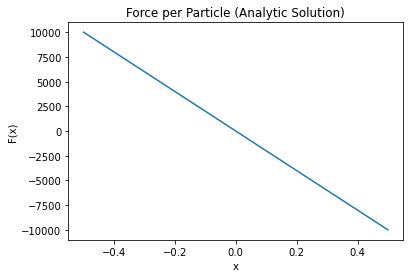

In [4]:
N = 10001
xs = np.linspace(-0.5,0.5,N)
s = time.time()
analytic_F = (- 2 * xs) * len(xs) 
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,analytic_F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force per Particle (Analytic Solution)");

(c) Now write the second part of the $N$-body code by writing a leapfrog integrator that integrates all $N$ particles forward for a time step $\delta t$ using the force function that you wrote in (b). 

Use this $N$-body code to integrate the following system of initial conditions
\begin{align}
  x & \in [-\pi/2,\pi/2]\\
  v &= -0.001\,\sin(x)\\
  N & = 10,001\,,
\end{align}

where the $x$ are evenly spaced in the interval given. These initial conditions are similar to those of a dark matter halo that has just started collapsing after decoupling from the Hubble expansion. 

- Integrate this system forward for a total time of $t = 200$ with $\delta t = 0.0005$. 
- Plot the phase-space distribution $(x,v)$ at times $t=0, 18, 25, 40, 132$, and $200$. 
- Describe what you see happening.

In [5]:
import time
import numpy as np 
import math

def force_per_particle(xs):
    F = np.zeros(len(xs))

    for i,x in enumerate(xs): 

        N_plus = len(xs[xs>x])

        N_minus = len(xs[xs<x])

        F[i] = N_plus - N_minus
    
    return F 

def force_per_particle_matrix(xs):
   
    x1,x2 = np.meshgrid(xs,xs,copy=False)
    x = x1 - x2
    d = np.sign(x)
    F = - np.sum(d,axis=0)
    return F 


N = 10001
t = 200
dt = 0.0005

xs = np.linspace(-np.pi/2,np.pi/2,N)

As = force_per_particle(xs)

vs = -0.001 * np.sin(xs)

x_ = []
v_ = []

ts = np.arange(t/dt)


run = False

if run:
    start = time.time()
    for t in ts:
        xs = xs + vs * dt + .5 * As * dt **2

        As_new = force_per_particle(xs)

        vs = vs + .5 * (As + As_new) * dt

        As = As_new

        if np.isin(t,[0,18,25,40,132,200]):

            x_.append(xs)

            v_.append(vs)

    print(f"Time {time.time() - start}")        

In [6]:
t/0.0005  * .29 /60  / 60

32.222222222222214

(d) The simulation that you ran is the same as that shown in the GIF at the start of chapter 6 in the notes, but the simulation in the notes solves the $N$-body problem exactly (which is possible in 1D, because the force does not depend on distance). 

Compare your simulation's output to the GIF and discuss why your simulation might (dis)agree with the GIF.

#### Problem 2: Recycling in chemical evolution and the abundance of deuterium.


In the class notes, we ignored the effect of recycling of unprocessed material by stars back into the ISM. That is, we assumed that gas consumed by star formation was fully lost from the ISM, except for the enriched ejecta that we described using the yield parameter $p$. However, in reality, winds from massive stars return a significant amount of mass to the ISM that was not changed by the star and thus returns mass to the ISM at the star's birth abundance $Z$.

Recycling is especially important to consider if we want to investigate the abundance of deuterium in the ISM. Deuterium is an interesting element because it is only destroyed by stars without being created (to a good approximation, deuterium is only produced during Big Bang nucleosynthesis [BBN]). As such, deuterium is a good tracer of whether or not gas has ever been in a star. For example, if most of the gas in the present-day Milky Way ISM was previously processed in stars, then the deuterium abundance in the ISM should be very small, because all of the deuterium should have been destroyed. The deuterium abundance of the ISM can be determined using UV spectroscopy and it is found to be approximately $90\%$ of the primordial BBN abundance. Let's see what we can learn about chemical evolution from this basic observation!

In this problem, we will denote the mass of the ISM in deuterium as $M_D$ and the fraction of the ISM in deuterium as $X_D = M_D/M_g$. The primordial deuterium abundance is $X_D^P$ (you don't need to know the actual value, but it is $\approx 2.6\times 10^{-5}$). The observations of deuterium of the ISM show that today $X_D/X_D^P \approx 0.9$. All of the following questions can be solved analytically using the same techniques as used in the notes for the closed/leaky/accreting box models.

(a) Extend the closed box model to include the effect of recycling, which we will model as happening instantaneously. Assume that a fraction $r$ of the mass turned into stars is returned to ISM at the ISM's abundance at the time of the formation of the star. Specifically, derive the relation between $Z$, $p$, and the gas fraction as in Equation (13.7) in the presence of recycling. Discuss.

(b) Now work out the closed box model with recycling for deuterium. Remember that no deuterium is created by stars. What is the relation between $X_D/X_D^P$, $r$, and the gas fraction? For the current ISM's values of the deuterium abundance and the gas fraction, what recycling fraction do you need to match the two?

(c) Stellar evolution tells us that $r \approx 0.4$. Compare this to the value you found in (b). If they are significantly different, explain the physical reason for this in the context of the closed box model.

(d) In class, we discussed how the accreting box model is successful at explaining the absence of a large number of very metal poor stars in the solar neighborhood (the G dwarf problem). Work out the evolution of the deuterium abundance $X_D/X_D^P$ in the accreting box model (with $\eta=0$), remembering that the specific model we looked at has a constant gas mass and that any inflowing gas has the primordial deuterium abundance. What recycling fraction $r$ do you need now to match $X_D/X_D^P$ given the observed gas fraction 

(e) Write the relation that you found in (d) in terms of the metallicity $Z$ of the ISM rather than the total-to-gas ratio $M/M_g$. Note that for this you will need to adjust the notes' accreting box model to take into account recycling (again use the $\eta=0$ version to keep things simpler). Try to obtain a very simple relation using the fact that $Z_\odot/p \ll 1$. 

Fun fact: the relation that you derive actually holds very generally, so there is a direct relation between the metallicity of the ISM and the ratio $X_D/X_D^P$, regardless of the details of inflow and outflow and the star formation history.

One take-away from this problem should be that most of the hydrogen in
the disk of the Milky Way has \emph{never} been inside of a
star. While all of the heavy elements in your body were produced in
stars, the hydrogen atoms that make up the $70\%$ or so of water in
your body were actually created in the Big Bang!

In [7]:
def slow_force_per_particle(xs): # :(

    s = time.time()
    x1,x2 = np.meshgrid(xs,xs,copy=False)
    print(f"Meshgrid {time.time() - s}")
    s1 = time.time()
    
    
    x = x1 - x2
    print(f"Sub {time.time() - s1}")
    s2 = time.time()
    
    #sign = lambda x: x and (1, -1)[x<0]
    
    d = np.sign(x)
    
    print(f"Sign {time.time() - s2}")
    s3 = time.time()
    F = - np.sum(d,axis=0)
    
    print(f"Sum {time.time() - s3}")
    return F 